In [1]:
## Import libraries

In [2]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(scales)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# It is important to emphasize that some samples do not have timestamps because it is not provided 
# for 'scheduled' status. But, I dont know its reason.

In [4]:
df_log <- read.csv(file = 'events.csv', sep = ',', stringsAsFactors = FALSE)
df_log$creation_timestamp <- as.POSIXct(df_log$creation_timestamp,format='%Y-%m-%dT%H:%M:%SZ', tzone = "UTC")
df_log$timestamp <- as.numeric(df_log$creation_timestamp)
#df_log$timestamp[is.na(df_log$timestamp)] <- Inf

df_log <- df_log %>%
  group_by(uid) %>%
  mutate(min_timestamp = min(timestamp)) %>%
  ungroup()
summary(df_log)

     uid                name           function_name     
 Length:129         Length:129         Length:129        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
 creation_timestamp            first_timestamp    last_timestamp    
 Min.   :2021-07-13 14:57:50   Length:129         Length:129        
 1st Qu.:2021-07-13 14:58:12   Class :character   Class :character  
 Median :2021-07-13 14:58:36   Mode  :character   Mode  :character  
 Mean   :2021-07-13 15:00:11                                        
 3rd Qu.:2021-07-13 15:01:06                                        
 Max.   :2021-07-13 15:13:54                                        
    reason              node             message            timestamp        
 Length:129         Length:129   

In [5]:
df_activations <- read.csv(file = 'activations.csv', sep = ',', stringsAsFactors = FALSE)
summary(df_activations)

  object_uid        object_name        function_name         duration        
 Length:77          Length:77          Length:77          Min.   :  0.00870  
 Class :character   Class :character   Class :character   1st Qu.:  0.08779  
 Mode  :character   Mode  :character   Mode  :character   Median :  0.70689  
                                                          Mean   : 13.93080  
                                                          3rd Qu.:  6.46312  
                                                          Max.   :180.67434  
                                                          NA's   :42         
   timestamp            reason            node         message       
 Min.   :1.626e+09   Length:77          Mode:logical   Mode:logical  
 1st Qu.:1.626e+09   Class :character   NA's:77        NA's:77       
 Median :1.626e+09   Mode  :character                                
 Mean   :1.626e+09                                                   
 3rd Qu.:1.626e+09        

In [6]:
####################################

In [7]:
# Timestamp analysis

In [8]:
####################################

In [9]:
### Filter the events file

In [10]:
df_filtered <- df_log %>%
    filter(
      reason == 'Scheduled' |
      reason == 'Pulling' |
      reason == 'Pulled' |
      reason == 'Created' |
      reason == 'Started' |
      reason == 'Killing')

df_selected <- df_filtered %>%
    select(-name, -uid, -message, -min_timestamp, -first_timestamp, -last_timestamp, -creation_timestamp)
summary(df_selected)

 function_name         reason              node             timestamp        
 Length:129         Length:129         Length:129         Min.   :1.626e+09  
 Class :character   Class :character   Class :character   1st Qu.:1.626e+09  
 Mode  :character   Mode  :character   Mode  :character   Median :1.626e+09  
                                                          Mean   :1.626e+09  
                                                          3rd Qu.:1.626e+09  
                                                          Max.   :1.626e+09  

In [11]:
### Process the events durations

In [12]:
df_spread <- df_selected %>%
    group_by_at(vars(-timestamp)) %>%
    mutate(sample_id = row_number()) %>% ungroup() %>%
    spread(reason, timestamp) %>%
    select(-sample_id) #%>%

print(df_spread)
df_processed <- df_spread

# A tibble: 38 x 8
   function_name  node        Created  Killing  Pulled Pulling Scheduled Started
   <chr>          <chr>         <dbl>    <dbl>   <dbl>   <dbl>     <dbl>   <dbl>
 1 chameleon1     paranoia-…   1.63e9   1.63e9  1.63e9  1.63e9    1.63e9  1.63e9
 2 chameleon1     paranoia-…  NA        1.63e9 NA      NA        NA      NA     
 3 facedetection1 paranoia-…  NA       NA       1.63e9  1.63e9    1.63e9 NA     
 4 facedetection2 paranoia-…   1.63e9   1.63e9  1.63e9  1.63e9    1.63e9  1.63e9
 5 facedetection2 paranoia-…  NA        1.63e9 NA      NA        NA      NA     
 6 facedetection3 paranoia-…   1.63e9   1.63e9  1.63e9  1.63e9    1.63e9  1.63e9
 7 facedetection3 paranoia-…  NA        1.63e9 NA      NA        NA      NA     
 8 facedetection3 paranoia-…  NA        1.63e9 NA      NA        NA      NA     
 9 floatoperatio… paranoia-…   1.63e9   1.63e9  1.63e9  1.63e9    1.63e9  1.63e9
10 floatoperatio… paranoia-…  NA        1.63e9 NA      NA        NA      NA     
# … with 

In [13]:
### Filter the activations file

In [14]:
df_activations_selected <- df_activations %>%
    select(
        function_name,
        timestamp,
        reason,
        node,
        object_uid) %>%
    drop_na(timestamp)
        #mutate(duration = (duration / 1000) %% 60)
summary(df_activations_selected)

 function_name        timestamp            reason            node        
 Length:42          Min.   :1.626e+09   Length:42          Mode:logical  
 Class :character   1st Qu.:1.626e+09   Class :character   NA's:42       
 Mode  :character   Median :1.626e+09   Mode  :character                 
                    Mean   :1.626e+09                                    
                    3rd Qu.:1.626e+09                                    
                    Max.   :1.626e+09                                    
  object_uid       
 Length:42         
 Class :character  
 Mode  :character  
                   
                   
                   

In [15]:
### First view of activations

In [16]:
head(df_activations_selected)

function_name  timestamp  reason         node
1 rnngenerate3   1626189897 finishing_time NA  
2 rnngenerate3   1626189897 starting_time  NA  
3 rnngenerate1   1626189892 finishing_time NA  
4 rnngenerate1   1626189892 starting_time  NA  
5 facedetection1 1626190042 finishing_time NA  
6 facedetection1 1626189867 starting_time  NA  
  object_uid                      
1 8e03a80ab46f4e1883a80ab46f5e187d
2 8e03a80ab46f4e1883a80ab46f5e187d
3 7b84d8cd42b449d084d8cd42b4c9d02b
4 7b84d8cd42b449d084d8cd42b4c9d02b
5 dd4c8e5010eb4b238c8e5010eb0b23f3
6 dd4c8e5010eb4b238c8e5010eb0b23f3

function_name  timestamp  reason         node
1 rnngenerate3   1626189897 finishing_time NA  
2 rnngenerate3   1626189897 starting_time  NA  
3 rnngenerate1   1626189892 finishing_time NA  
4 rnngenerate1   1626189892 starting_time  NA  
5 facedetection1 1626190042 finishing_time NA  
6 facedetection1 1626189867 starting_time  NA  
  object_uid                      
1 8e03a80ab46f4e1883a80ab46f5e187d
2 8e03a80ab46f4e1883a80ab46f5e187d
3 7b84d8cd42b449d084d8cd42b4c9d02b
4 7b84d8cd42b449d084d8cd42b4c9d02b
5 dd4c8e5010eb4b238c8e5010eb0b23f3
6 dd4c8e5010eb4b238c8e5010eb0b23f3

Saving 6.67 x 6.67 in image



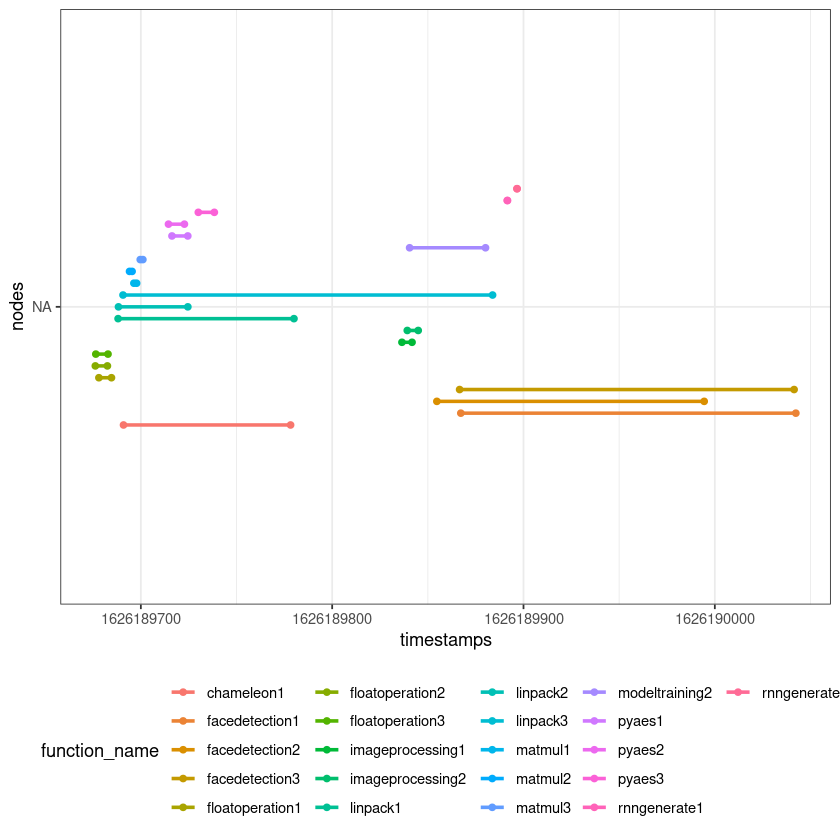

In [17]:
df_plot <- df_activations_selected #%>% drop_na(timestamp)
head(df_plot)
ggplot(data = df_plot, aes(x = node, 
                           #y = as.POSIXct(timestamp, origin = "1970-01-01"), 
                           y = timestamp,
                           color = function_name,
                           #shape = reason,
                           group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.5)) + 
    geom_point(position = position_dodge(width = 0.5)) +
    coord_flip() +

labs(x = "nodes", y = "timestamps", color = "function_name") +
   scale_fill_brewer(palette = "Dark2") +
   theme_bw() +
   theme(legend.position="bottom") +
   ggsave('full_line_plot_filtered.png')

In [18]:
### Spread the timestamps of activations by categories

In [19]:
df_activations_selected <- df_activations %>%
    select(
       function_name,
       timestamp,
       reason) %>%
    drop_na()
    #mutate(duration = (duration / 1000) %% 60)
summary(df_activations_selected)

df_spread_activations <- df_activations_selected %>%
   group_by_at(vars(-timestamp)) %>%
   mutate(sample_id = row_number()) %>% ungroup() %>%
   spread(reason, timestamp) %>%
   select(-sample_id)

head(df_spread_activations)
tail(df_spread_activations)

 function_name        timestamp            reason         
 Length:42          Min.   :1.626e+09   Length:42         
 Class :character   1st Qu.:1.626e+09   Class :character  
 Mode  :character   Median :1.626e+09   Mode  :character  
                    Mean   :1.626e+09                     
                    3rd Qu.:1.626e+09                     
                    Max.   :1.626e+09                     

function_name   finishing_time starting_time
1 chameleon1      1626189778     1626189691   
2 facedetection1  1626190042     1626189867   
3 facedetection2  1626189994     1626189855   
4 facedetection3  1626190041     1626189867   
5 floatoperation1 1626189685     1626189678   
6 floatoperation2 1626189683     1626189676

function_name  finishing_time starting_time
1 modeltraining2 1626189880     1626189840   
2 pyaes1         1626189725     1626189716   
3 pyaes2         1626189723     1626189714   
4 pyaes3         1626189738     1626189730   
5 rnngenerate1   1626189892     1626189892   
6 rnngenerate3   1626189897     1626189897

In [20]:
### Merge the activations and events data

In [21]:
df_events_to_join <- df_processed #%>% mutate(id = row_number())
head(df_events_to_join)
df_activations_to_join <- df_spread_activations #%>% mutate(id = row_number())
head(df_activations_to_join)

df_all <- full_join(
   df_events_to_join,
   df_activations_to_join,
   by="function_name") #%>%
   #distinct()
#df_all[is.na(df_all)] = 0

df_gathered <- df_all %>%
    gather(
        factor_key = 'TRUE',
        key = 'reason',
        value = 'timestamp',
        -function_name, -node) 

df_gathered$reason <- str_replace_all(df_gathered$reason, 'Scheduled', '00_pod_scheduled')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Pulling', '01_container_pulling')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Pulled', '02_container_pulled')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Created', '03_container_created')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Started', '04_container_started')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'starting_time', '05_function_started')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'finishing_time', '06_function_finished')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Killing', '07_finishing_container')

head(df_gathered)
summary(df_gathered)

function_name  node                          Created    Killing    Pulled    
1 chameleon1     paranoia-8.rennes.grid5000.fr 1626181089 1626181154 1626181086
2 chameleon1     paranoia-8.rennes.grid5000.fr         NA 1626181154         NA
3 facedetection1 paranoia-7.rennes.grid5000.fr         NA         NA 1626181348
4 facedetection2 paranoia-8.rennes.grid5000.fr 1626181283 1626182026 1626181281
5 facedetection2 paranoia-8.rennes.grid5000.fr         NA 1626182026         NA
6 facedetection3 paranoia-5.rennes.grid5000.fr 1626181292 1626182034 1626181289
  Pulling    Scheduled  Started   
1 1626181073 1626181072 1626181090
2         NA         NA         NA
3 1626181248 1626181246         NA
4 1626181273 1626181250 1626181283
5         NA         NA         NA
6 1626181269 1626181266 1626181293

function_name   finishing_time starting_time
1 chameleon1      1626189778     1626189691   
2 facedetection1  1626190042     1626189867   
3 facedetection2  1626189994     1626189855   
4 facedetection3  1626190041     1626189867   
5 floatoperation1 1626189685     1626189678   
6 floatoperation2 1626189683     1626189676

function_name  node                          reason               timestamp 
1 chameleon1     paranoia-8.rennes.grid5000.fr 03_container_created 1626181089
2 chameleon1     paranoia-8.rennes.grid5000.fr 03_container_created         NA
3 facedetection1 paranoia-7.rennes.grid5000.fr 03_container_created         NA
4 facedetection2 paranoia-8.rennes.grid5000.fr 03_container_created 1626181283
5 facedetection2 paranoia-8.rennes.grid5000.fr 03_container_created         NA
6 facedetection3 paranoia-5.rennes.grid5000.fr 03_container_created 1626181292

 function_name          node              reason            timestamp        
 Length:304         Length:304         Length:304         Min.   :1.626e+09  
 Class :character   Class :character   Class :character   1st Qu.:1.626e+09  
 Mode  :character   Mode  :character   Mode  :character   Median :1.626e+09  
                                                          Mean   :1.626e+09  
                                                          3rd Qu.:1.626e+09  
                                                          Max.   :1.626e+09  
                                                          NA's   :99         

In [22]:
df_plot <- df_gathered
summary(df_plot)


df_plot <- df_gathered %>% drop_na(timestamp)
summary(df_plot)
head(df_plot)
tail(df_plot)
print(df_plot)

 function_name          node              reason            timestamp        
 Length:304         Length:304         Length:304         Min.   :1.626e+09  
 Class :character   Class :character   Class :character   1st Qu.:1.626e+09  
 Mode  :character   Mode  :character   Mode  :character   Median :1.626e+09  
                                                          Mean   :1.626e+09  
                                                          3rd Qu.:1.626e+09  
                                                          Max.   :1.626e+09  
                                                          NA's   :99         

 function_name          node              reason            timestamp        
 Length:205         Length:205         Length:205         Min.   :1.626e+09  
 Class :character   Class :character   Class :character   1st Qu.:1.626e+09  
 Mode  :character   Mode  :character   Mode  :character   Median :1.626e+09  
                                                          Mean   :1.626e+09  
                                                          3rd Qu.:1.626e+09  
                                                          Max.   :1.626e+09  

function_name   node                          reason               timestamp 
1 chameleon1      paranoia-8.rennes.grid5000.fr 03_container_created 1626181089
2 facedetection2  paranoia-8.rennes.grid5000.fr 03_container_created 1626181283
3 facedetection3  paranoia-5.rennes.grid5000.fr 03_container_created 1626181292
4 floatoperation1 paranoia-6.rennes.grid5000.fr 03_container_created 1626181087
5 floatoperation2 paranoia-6.rennes.grid5000.fr 03_container_created 1626181087
6 floatoperation3 paranoia-6.rennes.grid5000.fr 03_container_created 1626181087

function_name node                          reason              timestamp 
1 pyaes2        paranoia-6.rennes.grid5000.fr 05_function_started 1626189714
2 pyaes3        paranoia-6.rennes.grid5000.fr 05_function_started 1626189730
3 pyaes3        paranoia-6.rennes.grid5000.fr 05_function_started 1626189730
4 rnngenerate1  paranoia-6.rennes.grid5000.fr 05_function_started 1626189892
5 rnngenerate3  paranoia-5.rennes.grid5000.fr 05_function_started 1626189897
6 rnngenerate3  paranoia-5.rennes.grid5000.fr 05_function_started 1626189897

# A tibble: 205 x 4
   function_name   node                          reason                timestamp
   <chr>           <chr>                         <chr>                     <dbl>
 1 chameleon1      paranoia-8.rennes.grid5000.fr 03_container_created 1626181089
 2 facedetection2  paranoia-8.rennes.grid5000.fr 03_container_created 1626181283
 3 facedetection3  paranoia-5.rennes.grid5000.fr 03_container_created 1626181292
 4 floatoperation1 paranoia-6.rennes.grid5000.fr 03_container_created 1626181087
 5 floatoperation2 paranoia-6.rennes.grid5000.fr 03_container_created 1626181087
 6 floatoperation3 paranoia-6.rennes.grid5000.fr 03_container_created 1626181087
 7 linpack1        paranoia-7.rennes.grid5000.fr 03_container_created 1626181091
 8 linpack2        paranoia-5.rennes.grid5000.fr 03_container_created 1626181091
 9 linpack3        paranoia-7.rennes.grid5000.fr 03_container_created 1626181091
10 matmul1         paranoia-6.rennes.grid5000.fr 03_container_created 1626181111
# … with

In [23]:
### Plot the merged data

Saving 6.67 x 6.67 in image

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 8. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 73 rows containing missing values (geom_point).”
Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 8. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 73 rows containing missing values (geom_point).”


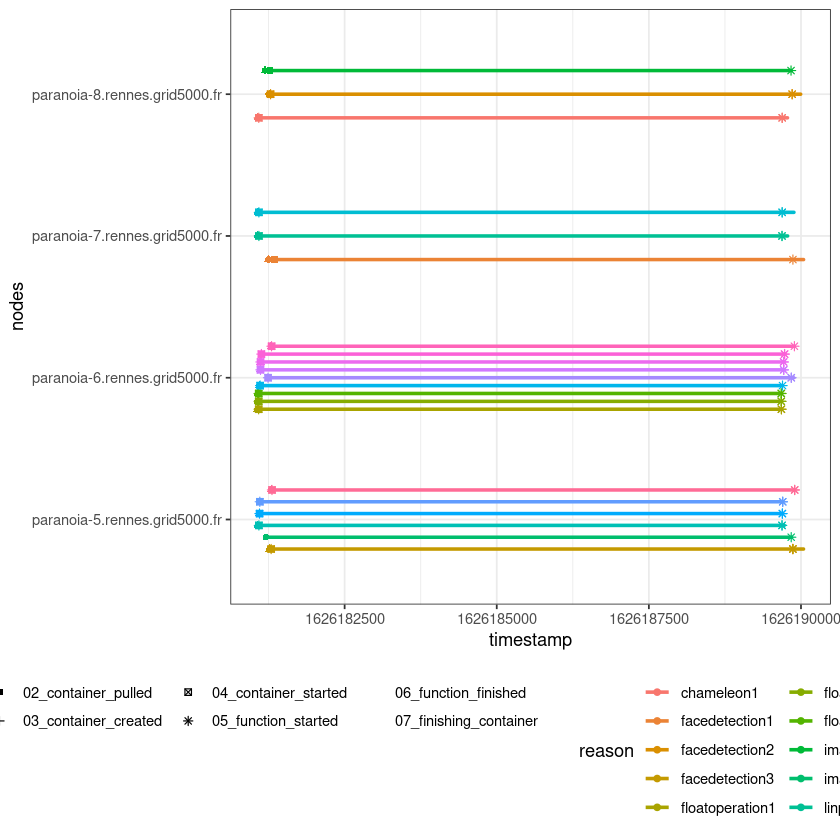

In [24]:
ggplot(data = df_plot, aes(x = node, 
                           y = timestamp, 
                           color = function_name,
                           shape = reason,
                           group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.5)) + 
    geom_point(position = position_dodge(width = 0.5)) +
    coord_flip() +
    labs(x = "nodes", y = "timestamp", color = "reason") +
       scale_fill_brewer(palette = "Dark2") +
       theme_bw() +
       theme(legend.position="bottom") +
       ggsave('full_line_plot_phases.png')

Saving 6.67 x 6.67 in image



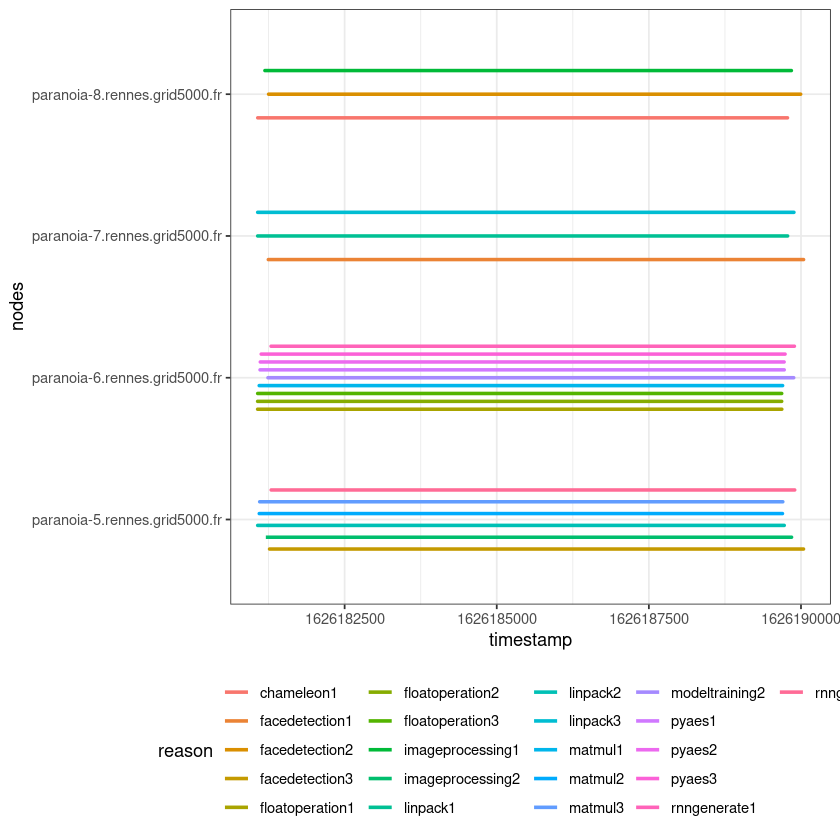

In [25]:
ggplot(data = df_plot, aes(x = node, 
                           y = timestamp, 
                           color = function_name,
                           group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.5)) + 
    #geom_point(position = position_dodge(width = 0.5)) +
    coord_flip() +
    labs(x = "nodes", y = "timestamp", color = "reason") +
       scale_fill_brewer(palette = "Dark2") +
       theme_bw() +
       theme(legend.position="bottom") +
       ggsave('full_line_plot_without_phases.png')

 function_name          node              reason            timestamp        
 Length:205         Length:205         Length:205         Min.   :1.626e+09  
 Class :character   Class :character   Class :character   1st Qu.:1.626e+09  
 Mode  :character   Mode  :character   Mode  :character   Median :1.626e+09  
                                                          Mean   :1.626e+09  
                                                          3rd Qu.:1.626e+09  
                                                          Max.   :1.626e+09  

 function_name          node              reason            timestamp        
 Length:76          Length:76          Length:76          Min.   :1.626e+09  
 Class :character   Class :character   Class :character   1st Qu.:1.626e+09  
 Mode  :character   Mode  :character   Mode  :character   Median :1.626e+09  
                                                          Mean   :1.626e+09  
                                                          3rd Qu.:1.626e+09  
                                                          Max.   :1.626e+09  

Saving 6.67 x 6.67 in image



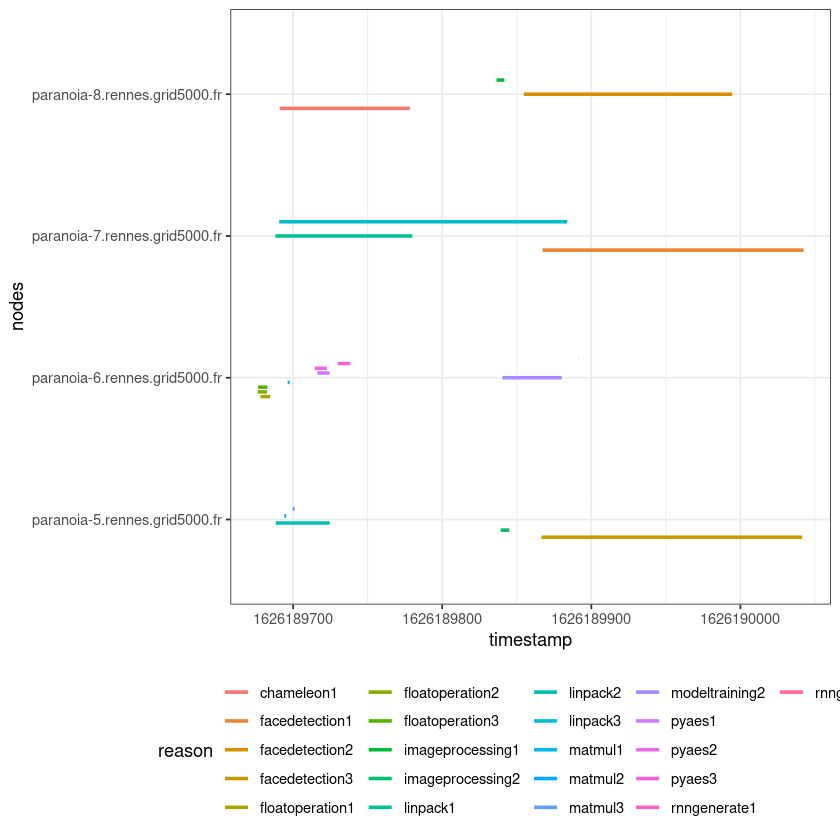

In [26]:
summary(df_plot)
df_plot2 <- df_plot %>% filter(reason == '05_function_started' | reason == '06_function_finished')
summary(df_plot2)
ggplot(data = df_plot2, aes(x = node, 
                           y = timestamp, 
                           color = function_name,
                           group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.3)) + 
    #geom_point(position = position_dodge(width = 0.5)) +
    coord_flip() +
    labs(x = "nodes", y = "timestamp", color = "reason") +
       scale_fill_brewer(palette = "Dark2") +
       theme_bw() +
       theme(legend.position="bottom") +
       ggsave('full_line_plot_functions_execution.png')

 function_name          node              reason            timestamp        
 Length:205         Length:205         Length:205         Min.   :1.626e+09  
 Class :character   Class :character   Class :character   1st Qu.:1.626e+09  
 Mode  :character   Mode  :character   Mode  :character   Median :1.626e+09  
                                                          Mean   :1.626e+09  
                                                          3rd Qu.:1.626e+09  
                                                          Max.   :1.626e+09  

 function_name          node              reason            timestamp        
 Length:59          Length:59          Length:59          Min.   :1.626e+09  
 Class :character   Class :character   Class :character   1st Qu.:1.626e+09  
 Mode  :character   Mode  :character   Mode  :character   Median :1.626e+09  
                                                          Mean   :1.626e+09  
                                                          3rd Qu.:1.626e+09  
                                                          Max.   :1.626e+09  

Saving 6.67 x 6.67 in image



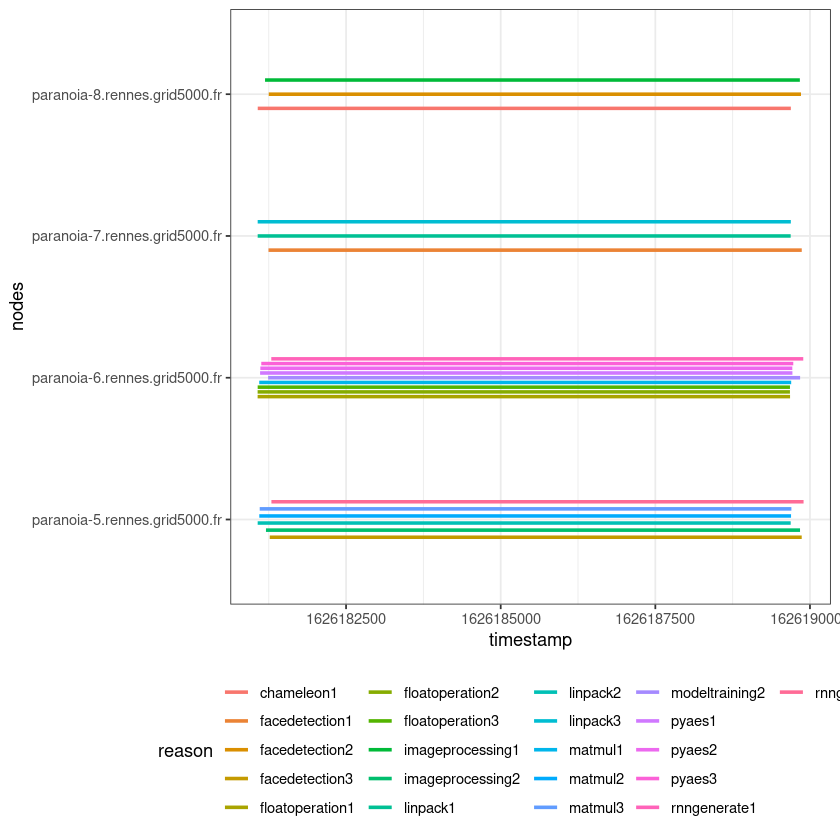

In [27]:
summary(df_plot)
df_plot2 <- df_plot %>% filter(reason == '00_pod_scheduled' | reason == '05_function_started')
summary(df_plot2)
ggplot(data = df_plot2, aes(x = node, 
                           y = timestamp, 
                           color = function_name,
                           group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.3)) + 
    #geom_point(position = position_dodge(width = 0.5)) +
    coord_flip() +
    labs(x = "nodes", y = "timestamp", color = "reason") +
       scale_fill_brewer(palette = "Dark2") +
       theme_bw() +
       theme(legend.position="bottom") +
       ggsave('full_line_plot2.png')

In [28]:
a <- df_plot %>% filter(function_name == 'facedetection1')
print(a)

# A tibble: 5 x 4
  function_name  node                          reason                 timestamp
  <chr>          <chr>                         <chr>                      <dbl>
1 facedetection1 paranoia-7.rennes.grid5000.fr 02_container_pulled  1626181348 
2 facedetection1 paranoia-7.rennes.grid5000.fr 01_container_pulling 1626181248 
3 facedetection1 paranoia-7.rennes.grid5000.fr 00_pod_scheduled     1626181246 
4 facedetection1 paranoia-7.rennes.grid5000.fr 06_function_finished 1626190042.
5 facedetection1 paranoia-7.rennes.grid5000.fr 05_function_started  1626189867.


function_name  node                          reason               timestamp 
1 chameleon1     paranoia-8.rennes.grid5000.fr 03_container_created 1626181089
2 chameleon1     paranoia-8.rennes.grid5000.fr 03_container_created         NA
3 facedetection1 paranoia-7.rennes.grid5000.fr 03_container_created         NA
4 facedetection2 paranoia-8.rennes.grid5000.fr 03_container_created 1626181283
5 facedetection2 paranoia-8.rennes.grid5000.fr 03_container_created         NA
6 facedetection3 paranoia-5.rennes.grid5000.fr 03_container_created 1626181292
  sample_id
1 1        
2 2        
3 1        
4 1        
5 2        
6 1

Warning message:
“Removed 99 rows containing non-finite values (stat_bin2d).”


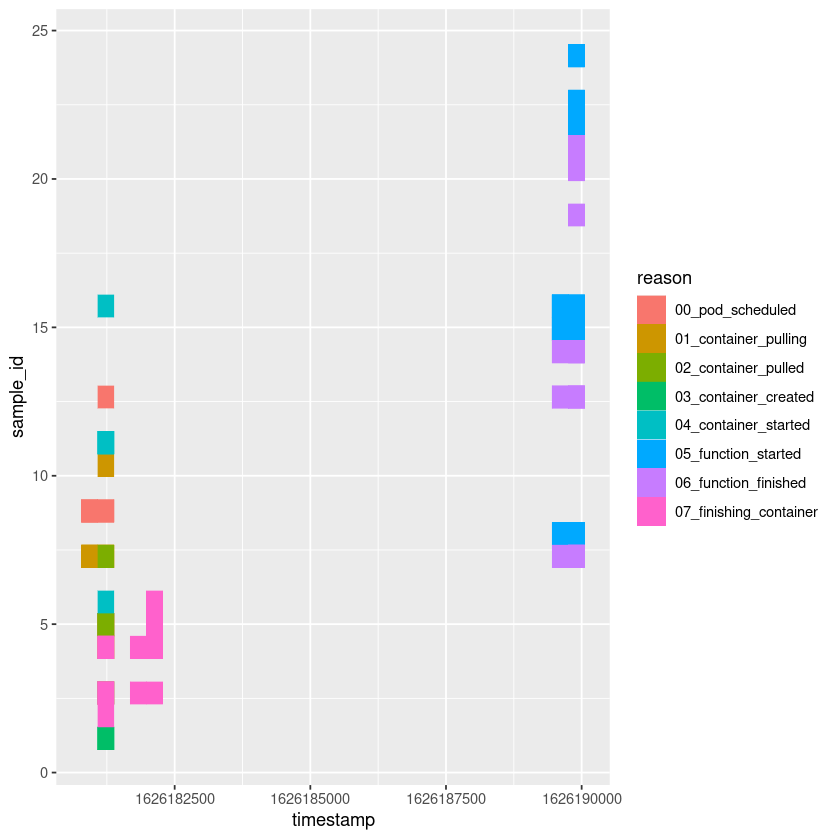

In [29]:
df_plot <- df_gathered %>%
    group_by(function_name, node) %>%
    mutate(sample_id = row_number()) %>% 
    ungroup() 
head(df_plot)

ggplot(data = df_plot, aes(x = timestamp, 
                           y = sample_id, 
                           color = reason, 
                           shape = node))+ #, color = node)) +
stat_bin2d(aes(fill = reason))

function_name  node                          reason               timestamp 
1 chameleon1     paranoia-8.rennes.grid5000.fr 03_container_created 1626181089
2 chameleon1     paranoia-8.rennes.grid5000.fr 03_container_created         NA
3 facedetection1 paranoia-7.rennes.grid5000.fr 03_container_created         NA
4 facedetection2 paranoia-8.rennes.grid5000.fr 03_container_created 1626181283
5 facedetection2 paranoia-8.rennes.grid5000.fr 03_container_created         NA
6 facedetection3 paranoia-5.rennes.grid5000.fr 03_container_created 1626181292
  sample_id
1 1        
2 2        
3 1        
4 1        
5 2        
6 1

Saving 6.67 x 6.67 in image

Warning message:
“Removed 99 rows containing missing values (position_stack).”
Warning message:
“Removed 99 rows containing missing values (position_stack).”


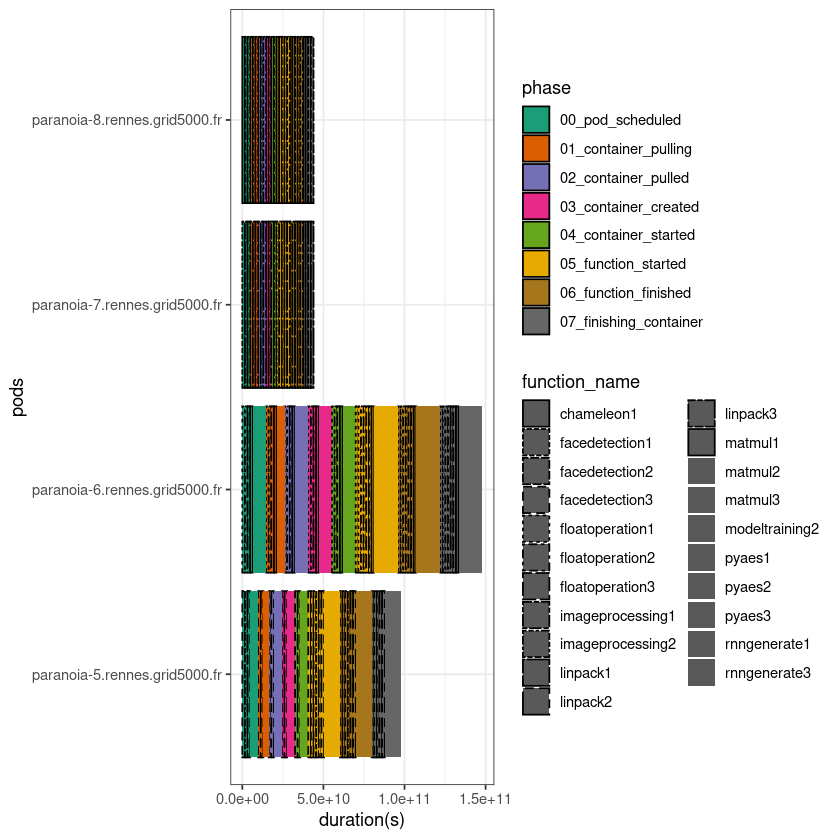

In [30]:
head(df_plot)
ggplot(data = df_plot, aes(x = timestamp, y = node, fill = reason, linetype = function_name))+#, color = node)) +
   geom_bar(stat='identity', position = position_stack(reverse = TRUE), color = "black")  +
   labs(x = "duration(s)", y = "pods", fill = "phase") +
   scale_fill_brewer(palette = "Dark2") +
   theme_bw() +
   ggsave('full_bar_plot_gantt.png')

In [31]:
df_plot2 <- df_plot %>% filter(function_name != 'videoprocessing1' & function_name != 'videoprocessing2' & function_name != 'videoprocessing3' &
                              function_name != 'imageprocessing1' & function_name != 'imageprocessing2' & function_name != 'imageprocessing3')

ggplot(data = df_plot2, aes(x = duration, y = function_name, fill = reason, linetype = node))+#, color = node)) +
   geom_bar(stat='identity', position = position_stack(reverse = TRUE), color = "black")  +
   labs(x = "duration(s)", y = "pods", fill = "phase") +
   scale_fill_brewer(palette = "Dark2") +
   theme_bw() +
   ggsave('full_line_plot_filtered.png')

Saving 6.67 x 6.67 in image



ERROR: Error in FUN(X[[i]], ...): object 'duration' not found
